# Exploratory Data Analysis

This EDA will evaluate the sales dataset for video games sales during 1985-2018

Dataset source: Kaggle

Same dataset can be found on my Github page: https://github.com/BA150030-utd/Video-Game-Sales-EDA-Dashboard 

# Objectives

Perform exploratory data analysis for Sales Dataset

Includes analysis and summury of dataset, in the form of charts and graghs

Conclude and articulate actionable insight from analysis

# Import Relevent Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import string
import re

from chart_studio import plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff

Here is what the dataframe looks like. We'll also extract some general information about our dataset

In [44]:
data = pd.read_csv("C://Users//Brian//Documents//PythonforDataScienceTraining//Video_Games_Sales.csv")
#You can use df.head function to display the desired row count
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [45]:
for col in data.columns: print(col)
list(data.columns)

Rank
Name
Platform
Year
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [46]:
x = data['Name'].unique()
y = data['Genre'].unique()
z = data['Publisher'].unique()
a = data['Platform'].unique()

In [47]:
print('Total Video Game Names',len(x))
print('Total Genres',len(y))
print('Total Publishers',len(z))
print('Total Platforms',len(a))

Total Video Game Names 11493
Total Genres 12
Total Publishers 579
Total Platforms 31


# Evaluating Columns/Finding Missing Values

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [49]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We haveing missing values for column Year (271) and column Publisher (58).

In [50]:
data.dropna(subset=['Year', 'Publisher'])
#Define in which columns to look for missing values

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Initially our dataset had 1698 rows and 11 columns (16598,11). I filtered out the rows which had null(missing) values based of off the columns "Year" and "Publisher"

 We now have 16291 rows and 11 columns (16291,11)

# Univariate Analysis: Relationships between Genres and Platforms 

Exploring video game sales in regards to genre and platform. Using a histogram will be useful because we are dealing with numerical values that can be measured on an interval scale. We can also use histrograms to detected any potential outliers. 

In [51]:
xaction=data[data.Genre=="Action"]
xsports=data[data.Genre=="Sports"]
xmisc=data[data.Genre=="Misc"]
xrole=data[data.Genre=="Role-Playing"]
xshooter=data[data.Genre=="Shooter"]
xadventure=data[data.Genre=="Adventure"]
xrace=data[data.Genre=="Racing"]
xplatform=data[data.Genre=="Platform"]
xsimulation=data[data.Genre=="Simulation"]
xfight=data[data.Genre=="Fighting"]
xstrategy=data[data.Genre=="Strategy"]
xpuzzle=data[data.Genre=="Puzzle"]

In [52]:
hist1 = go.Histogram(x=xaction.Platform,opacity=0.75,name="Action",marker=dict(color='rgb(165,0,38)'))

hist2 = go.Histogram(x=xsports.Platform,opacity=0.75,name="Sports",marker=dict(color='rgb(215,48,39)'))

hist3 = go.Histogram(x=xmisc.Platform,opacity=0.75,name="Misc",marker=dict(color='rgb(244,109,67)'))

hist4 = go.Histogram(x=xrole.Platform,opacity=0.75,name="RPG",marker=dict(color='rgb(253,174,97)'))

hist5 = go.Histogram(x=xshooter.Platform,opacity=0.75,name="Shooter",marker=dict(color='rgb(254,224,144)'))

hist6 = go.Histogram(x=xadventure.Platform,opacity=0.75,name="Adventure",marker=dict(color='rgb(170,253,87)'))

hist7 = go.Histogram(x=xrace.Platform,opacity=0.75,name="Racing",marker=dict(color='rgb(171,217,233)'))

hist8 = go.Histogram(x=xplatform.Platform,opacity=0.75,name="Platform",marker=dict(color='rgb(116,173,209)'))

hist9 = go.Histogram(x=xsimulation.Platform,opacity=0.75,name="Simulation",marker=dict(color='rgb(69,117,180)'))

hist10 = go.Histogram(x=xfight.Platform,opacity=0.75,name="Fighting",marker=dict(color='rgb(49,54,149)'))

hist11 = go.Histogram(x=xstrategy.Platform,opacity=0.75,name="Strategy",marker=dict(color='rgb(10,77,131)'))

hist12 = go.Histogram(x=xpuzzle.Platform,opacity=0.75,name="Puzzle",marker=dict(color='rgb(1,15,139)'))

hist_data =[hist1,hist2,hist3,hist4,hist5,hist6,hist7,hist8,hist9,hist10,hist11,hist12]
layout = go.Layout(barmode='stack',
                  title='Genre/Platform Relationship',
                  xaxis=dict(title='Platform'),
                  yaxis=dict(title='# of Games'),
                  paper_bgcolor='white', plot_bgcolor='gray')
fig = go.Figure(hist_data, layout=layout)
iplot(fig)


This displays the number of games that particualr platform has. From this graph, we can conclude that Nintendo DS and PS2 had the most games availabe overall. However the histogram also shows that the PS3 and PS2 had the most games in the Action genre compared to the other platforms. PC has the most games in the Strategy Genre then any other platform. 

We can make conclusions like these in regards any other genre on the dataset and compare them to other variables.

In [53]:
genre_action = len(data[data['Genre']=='Action'])
genre_sports = len(data[data['Genre']=='Sports'])
genre_rpg = len(data[data['Genre']=='Role-Playing'])
genre_shooter = len(data[data['Genre']=='Shooter'])
genre_adv = len(data[data['Genre']=='Adventure'])
genre_race = len(data[data['Genre']=='Racing'])
genre_platform = len(data[data['Genre']=='Platform'])
genre_sim = len(data[data['Genre']=='Simulation'])
genre_fight = len(data[data['Genre']=='Fighting'])
genre_strat = len(data[data['Genre']=='Strategy'])
genre_puzzle = len(data[data['Genre']=='Puzzle'])

print(" Total Action Games: ",genre_action,"\n",
      "Total Sports Games: ",genre_sports,"\n",
      "Total RPG Games ",genre_rpg,"\n",
      "Total Shooter Games ",genre_shooter,"\n",
      "Total Adventure Games ",genre_adv,"\n",
     )



 Total Action Games:  3316 
 Total Sports Games:  2346 
 Total RPG Games  1488 
 Total Shooter Games  1310 
 Total Adventure Games  1286 



# Number of Games Per Genre

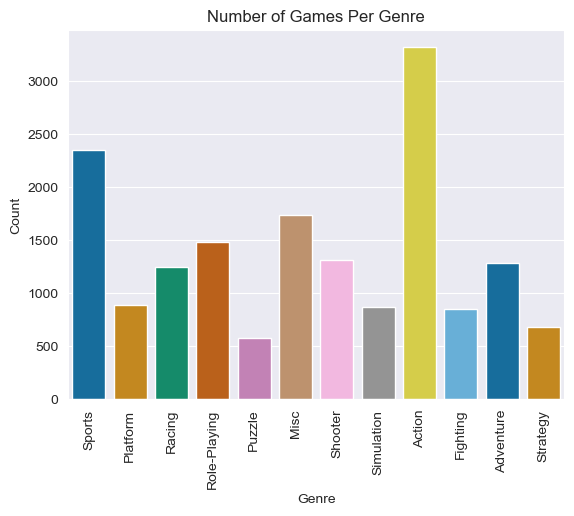

In [54]:
sns.set_style('darkgrid')

sns.countplot(x='Genre',data=data,palette='colorblind').set(title='Number of Games Per Genre')
plt.xlabel("Genre")
plt.xticks(rotation='90', fontsize = 10)
plt.ylabel("Count")

plt.show() 

The highest number of available games by genre would be Action. It as the most games out of any other genre. Sports would fall second, and Misc(indie-games) would come third.

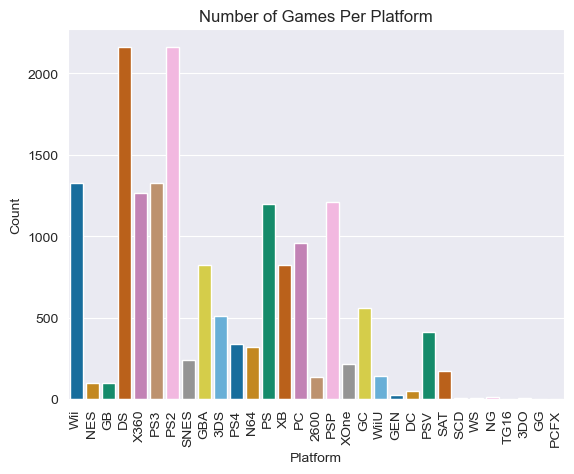

In [55]:
sns.set_style('darkgrid')
sns.countplot(x='Platform',data=data,palette='colorblind').set(title='Number of Games Per Platform')
#For sns plot titles, you can also use the function "plt.title('insert title here')" 
plt.xlabel("Platform")
plt.xticks(rotation='90', fontsize = 10)
plt.ylabel("Count")
plt.show() 

The PS2 and DS platforms offer the highest variety of games out of any other console. Followed by PS3 and xbox. Out of all of the platforms, I can speculate that the highest variety of games for a platform, would generally fall under the Playstion, Xbox, and Nintendo owned platforms

# Multi-variable Data Visualization

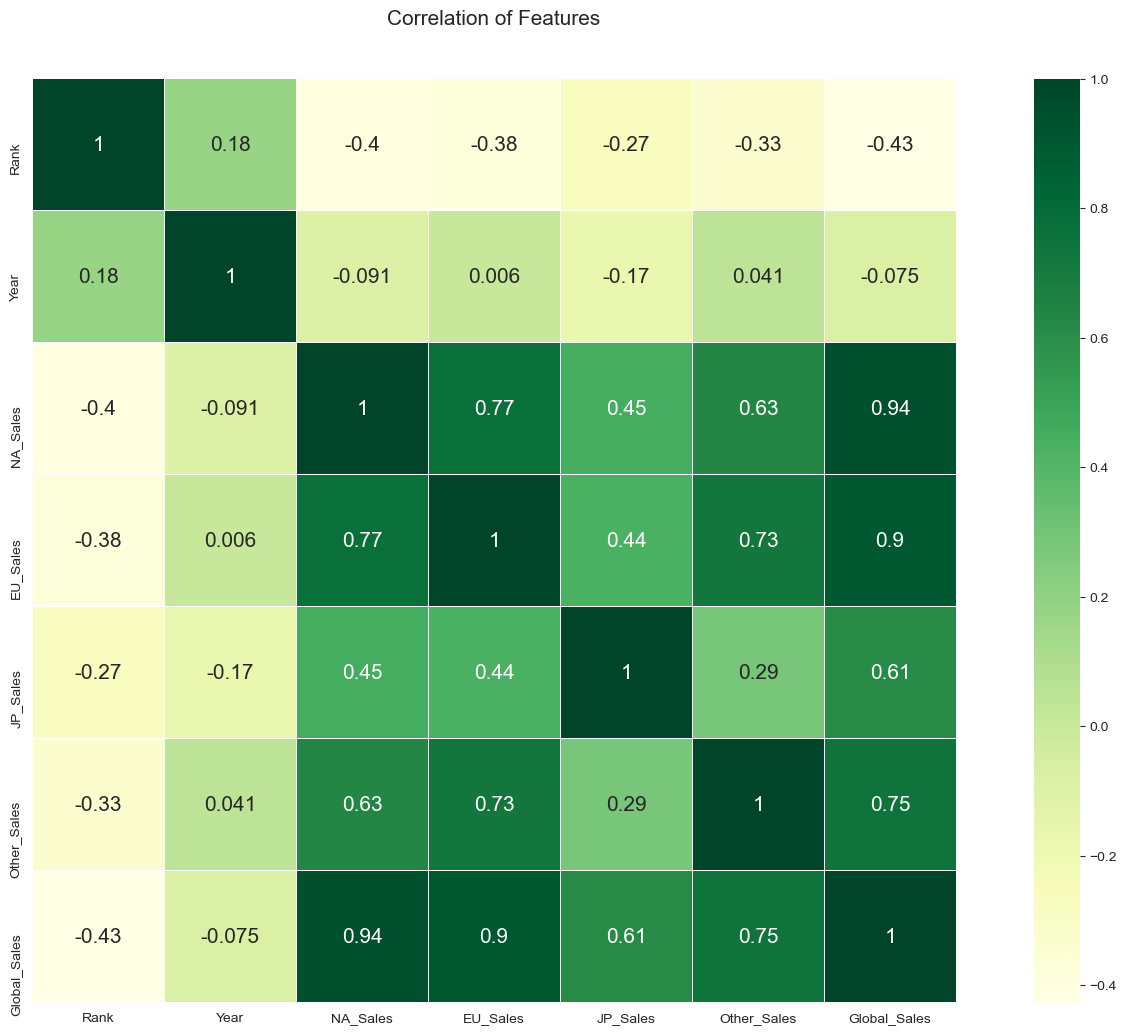

In [56]:
corr = data.corr()

f,ax=plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(200,10, as_cmap = True)

data_hp = sns.heatmap(corr, cmap="YlGn",square = True, ax=ax, annot=True, linewidth = 0.1, annot_kws={"size":15})
plt.title('Correlation of Features', y=1.05, size=15)
plt.show()

The closest realtionship I was able to find was the correlation between Global Sales and the Sales of each region. To simply this matrix, the sales of each region will effect the global sales (common sense). We see correlation of more than 0.6 and higher between these features. All other features have low correlation scores, for instance the Sales between America and Japan

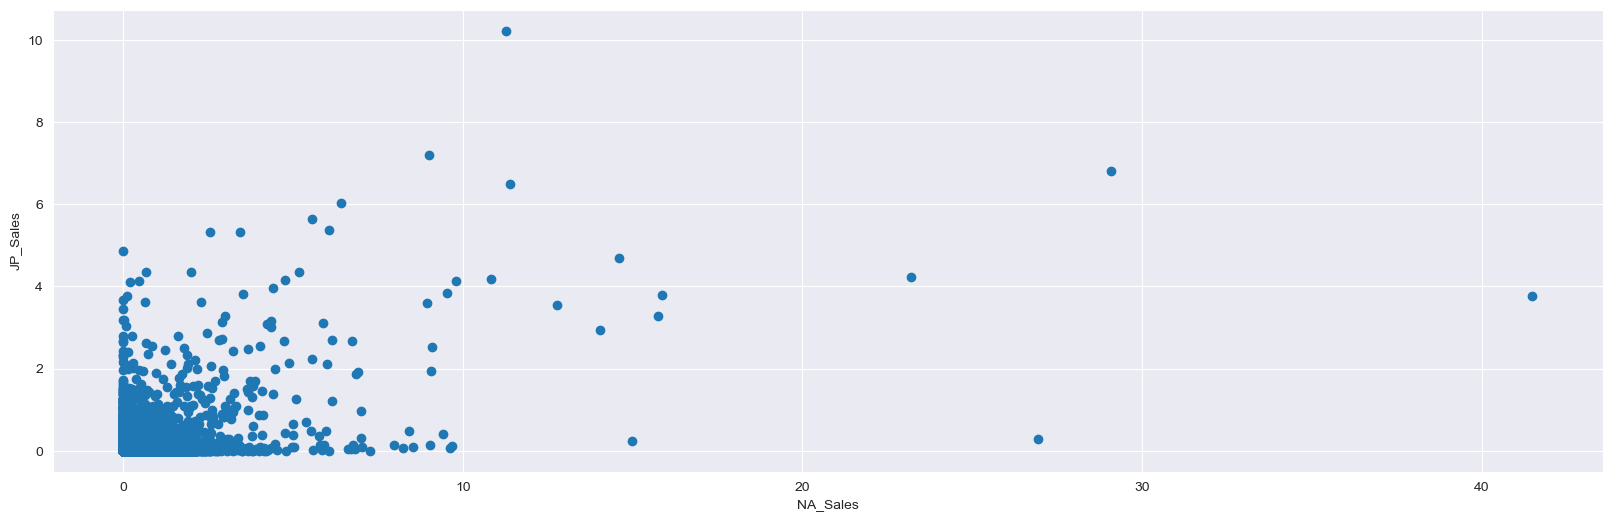

In [57]:
fig,ax = plt.subplots(figsize=(20,6))
ax.scatter(data['NA_Sales'],data['JP_Sales'])
ax.set_xlabel("NA_Sales")
ax.set_ylabel('JP_Sales')
plt.show()

Scatter Plot for America Sales and Japan Sales. There not much correlation between the two. This could potentially mean that the market for video games could mostly unique from one another. What games to market and how to market in North America could be less successful and profitable in Japan. Vice Versa. 

# Genres and Global Sales

Seeing if there is any relationship with genres and global sales. The graph below shows the total global_sales according to genre and their platforms.

In [58]:
bar1 = go.Bar(
    x=xaction.groupby("Platform")["Global_Sales"].sum().index,
    y=xaction.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Action",
    marker=dict(color="rgb(119,172,238)"))
bar2 = go.Bar(
    x=xsports.groupby("Platform")["Global_Sales"].sum().index,
    y=xsports.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(21,90,174)'))
bar3 = go.Bar(
    x=xrace.groupby("Platform")["Global_Sales"].sum().index,
    y=xrace.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Racing",
    marker=dict(color="rgb(156,245,163)"))
bar4 = go.Bar(
    x=xshooter.groupby("Platform")["Global_Sales"].sum().index,
    y=xshooter.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color="rgb(14,135,23)"))
bar5 = go.Bar(
    x=xmisc.groupby("Platform")["Global_Sales"].sum().index,
    y=xmisc.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(252,118,103)'))
bar6 = go.Bar(
    x=xrole.groupby("Platform")["Global_Sales"].sum().index,
    y=xrole.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color="rgb(226,28,5)"))
bar7 = go.Bar(
    x=xfight.groupby("Platform")["Global_Sales"].sum().index,
    y=xfight.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color="rgb(247,173,13)"))
bar8 = go.Bar(
    x=xplatform.groupby("Platform")["Global_Sales"].sum().index,
    y=xplatform.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Platform",
    marker=dict(color="rgb(242,122,13)"))
bar9 = go.Bar(
    x=xsimulation.groupby("Platform")["Global_Sales"].sum().index,
    y=xsimulation.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color="rgb(188,145,202)"))
bar10 = go.Bar(
    x=xadventure.groupby("Platform")["Global_Sales"].sum().index,
    y=xadventure.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(104,57,119)'))
bar11 = go.Bar(
    x=xstrategy.groupby("Platform")["Global_Sales"].sum().index,
    y=xstrategy.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(245,253,104)'))
bar12 = go.Bar(
    x=xpuzzle.groupby("Platform")["Global_Sales"].sum().index,
    y=xpuzzle.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(138,72,40)'))

data = [bar1, bar2,bar3,bar4,bar5,bar6,bar7,bar8,bar9,bar10,bar11,bar12]
layout = go.Layout(barmode='stack',
                   title='Total Global Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Global Sales(In Millions)'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

From the graph we can infer that sports and action would result to higher global sales. We can also infor that the genres that sell more on a global scale have been on the playstation, xbox, and Ninnetedo Wii platforms. 

Improved generation of these 3 platforms are sold a couple few years. Game development companies can use this information to decide what platform would best suit there game in regards to sales.

Companies that create gaming consoles can also use this informaton to decide which game development company would most compilent overall video game sales. Additionally, companies can design there console to cater towards a specific genre

# Leading Game Publishers

In [67]:
data = pd.read_csv("C://Users//Brian//Documents//PythonforDataScienceTraining//Video_Games_Sales.csv")
df=data.head(100)

In [68]:
trace = go.Histogram(x=df.Publisher,marker=dict(color="lightblue",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

52 of the 100 top sold games were published by Nintendo, followed by EA(5) and Activision(14)

In [69]:
data = pd.read_csv("C://Users//Brian//Documents//PythonforDataScienceTraining//Video_Games_Sales.csv")
data['Publisher'].value_counts().sort_values()

PM Studios                         1
Media Entertainment                1
Codemasters Online                 1
Berkeley                           1
Kando Games                        1
                                ... 
Konami Digital Entertainment     832
Ubisoft                          921
Namco Bandai Games               932
Activision                       975
Electronic Arts                 1351
Name: Publisher, Length: 578, dtype: int64

In [70]:
Pubs=data.groupby(['Publisher']).count().sort_values('Name',ascending=False)
Pubs=Pubs[Pubs['Name']>50]
Pubs.head()

,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,,
Electronic Arts,1351,1351,1351,1339,1351,1351,1351,1351,1351,1351
Activision,975,975,975,966,975,975,975,975,975,975
Namco Bandai Games,932,932,932,928,932,932,932,932,932,932
Ubisoft,921,921,921,918,921,921,921,921,921,921
Konami Digital Entertainment,832,832,832,823,832,832,832,832,832,832


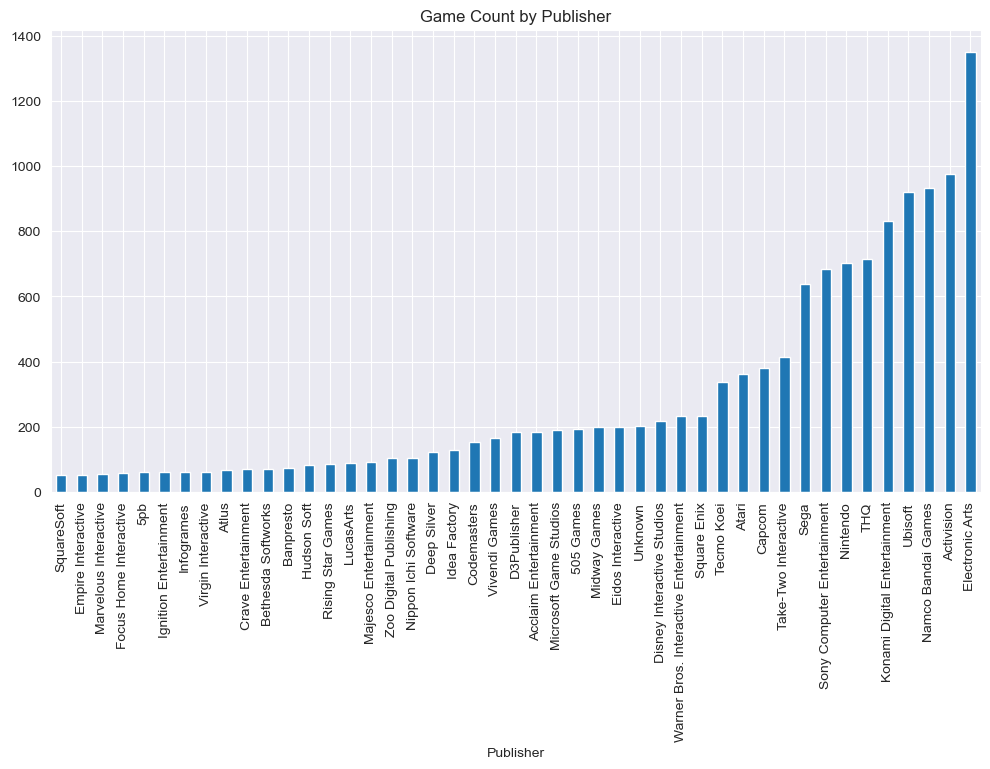

In [71]:
plt.figure(figsize=(12,6))
Pubs['Name'].sort_values(ascending=True).plot.bar()
plt.title('Game Count by Publisher')
plt.show()

From the two graphs above, Electronics Arts published the most games. However, Nintendo was able to generate more sales per game than Electronic Arts. We can infer that EA pushes alot of their efforts in publishing games, but each game they have published and sold were not nearly as successful to Nintendo in terms of video game profits.

# Genre and Region Relationship Analysis

Evaluating Sales in Regards to Genre and Region. We'll create a subset that'll be helpful in orgnizing our needed data for the graphs

In [72]:
data = pd.read_csv("C://Users//Brian//Documents//PythonforDataScienceTraining//Video_Games_Sales.csv")

genre=pd.DataFrame(data.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum())
genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(data["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
genrecount.rename(columns={"Genre":"Counts","index":"Genre"}, inplace=True)

genre=pd.merge(genre,genrecount,on="Genre")

In [73]:
gr_table=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]

gr_table = gr_table.rename(columns={"NA_Sales":"America","EU_Sales":"Europe","JP_Sales":"Japan","Other_Sales":"Other Sales","Global_Sales":"Total"})

gr_table

,Genre,America,Europe,Japan,Other Sales,Total
0,Action,877.83,525.00,159.95,187.38,1751.18
1,Adventure,105.80,64.13,52.07,16.81,239.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
3,Misc,410.24,215.98,107.76,75.32,809.96
4,Platform,447.05,201.63,130.77,51.59,831.37
5,Puzzle,123.78,50.78,57.31,12.55,244.95
6,Racing,359.42,238.39,56.69,77.27,732.04
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20


In [74]:
x=genre.Genre
NA_Perce=list(genre["NA_Sales"]/genre["Global_Sales"]*100)
EU_Perce=list(genre["EU_Sales"]/genre["Global_Sales"]*100)
JP_Perce=list(genre["JP_Sales"]/genre["Global_Sales"]*100)
Other_Perce=list(genre["Other_Sales"]/genre["Global_Sales"]*100)

trace1 = go.Bar(
                x=x,
                y=NA_Perce,
                name="America" ,
                xaxis='x2', yaxis='y2',
                marker=dict(
                            color='rgb(158,202,225)',line=dict(color='rgb(8,48,107)',width=3),
                            ),opacity=0.75)
trace2 = go.Bar(
                x=x,
                y=EU_Perce,
                xaxis='x2', yaxis='y2',
                marker=dict(color='red',line=dict(color='rgb(8,48,107)',width=3),
                            ),opacity=0.75,name = "Europe",
                )
trace3 = go.Bar(
                x=x,
                y=JP_Perce,
                xaxis='x2', yaxis='y2',
                marker=dict(color='orange',line=dict(color='rgb(8,48,107)',width=3),
                            ),opacity=0.75,name = "Japan",
                )
trace4 = go.Bar(
                x=x,
                y=Other_Perce,
                xaxis='x2', yaxis='y2',
                marker=dict(color='purple',line=dict(color='rgb(8,48,107)',width=3),
                            ),opacity=0.75,name = "Other Sales",)

trace5=go.Table(
  header = dict(
    values = gr_table.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [gr_table.Genre,round(gr_table["America"]),round(gr_table["Europe"]), round(gr_table["Japan"]), round(gr_table["Other Sales"]),round(gr_table["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Top 100 Video Games

In [75]:
data = pd.read_csv("C://Users//Brian//Documents//PythonforDataScienceTraining//Video_Games_Sales.csv")
df=data.head(100)

In [76]:
trace1 = go.Scatter(
                    x = df.Rank,
                    y = df.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= df.Name)

trace2 = go.Scatter(
                    x = df.Rank,
                    y = df.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= df.Name)
trace3 = go.Scatter(
                    x = df.Rank,
                    y = df.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= df.Name)
trace4 = go.Scatter(
                    x = df.Rank,
                    y = df.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'lime',size=8),
                    text= df.Name)
                    

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

We now take the top 100 games and evaluate how well they sold in each region. From the graph we can infer that North America generally had the highest sales in regards to the top 100 games sold. Europe being second, Japan third, and other regions last in fourth. 

What does this mean? 

If we are talking about a about a positive return of investment, we can say that North America would be our best choice. Selling games in North America will create more profit in relation to other regions. Additionally, we previously inferred that action games were very popular in this region. Knowing the genre of game people to develop and understanding the sales demopographic can help game developers and publishers grow their sales.

# Scatter Matrix

Displayed below are the relationships for the top 100 games in regards to their release year and platform for the North America and Europe regions

In [77]:
df2 = df.loc[:,["Year","Platform","NA_Sales","EU_Sales" ]]

df2["index"] = np.arange(1,len(df)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(df2, diag='box', index='index',colormap='YlOrRd',
                                  colormap_type='seq',
                                  height=1000, width=1200)
iplot(fig)

C:\Users\Brian\anaconda3\lib\site-packages\plotly\tools.py:590: UserWarning:

plotly.tools.FigureFactory.create_scatterplotmatrix is deprecated. Use plotly.figure_factory.create_scatterplotmatrix

